In [ ]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn

In [62]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
data = pd.read_csv("Energy_consumption.csv")
data.head()

In [64]:
day_map = {
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6,
    'Sunday':7
}

data['DayOfWeek'] = data['DayOfWeek'].map(day_map)

<Axes: xlabel='Temperature', ylabel='Humidity'>

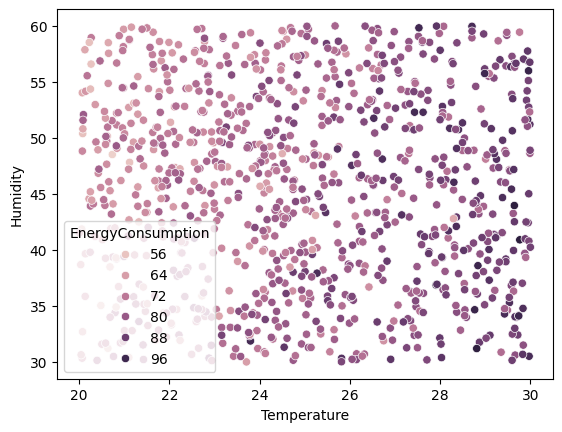

In [65]:
sns.scatterplot(x = "Temperature",y = "Humidity" ,data = data,hue = "EnergyConsumption")

In [66]:
data['HVACUsage'] = data['HVACUsage'].map({'On':1 ,'Off':0 })
data['LightingUsage'] = data['LightingUsage'].map({'On':1 ,'Off':0 })
data['Holiday'] = data['Holiday'].map({'Yes':1 ,'No':0 })

In [67]:
data

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,1,0,2.774699,1,0,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,1,1,21.831384,6,0,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,0,0,6.764672,7,0,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,0,1,8.623447,3,0,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,1,0,3.071969,5,0,70.811732
...,...,...,...,...,...,...,...,...,...,...,...
995,2022-02-11 11:00:00,28.619382,48.850160,1080.087000,5,0,0,21.194696,6,0,82.306692
996,2022-02-11 12:00:00,23.836647,47.256435,1705.235156,4,0,1,25.748176,2,1,66.577320
997,2022-02-11 13:00:00,23.005340,48.720501,1320.285281,6,0,1,0.297079,5,1,72.753471
998,2022-02-11 14:00:00,25.138365,31.306459,1309.079719,3,1,0,20.425163,4,1,76.950389


In [68]:
data = data.drop(columns = ['Timestamp'])


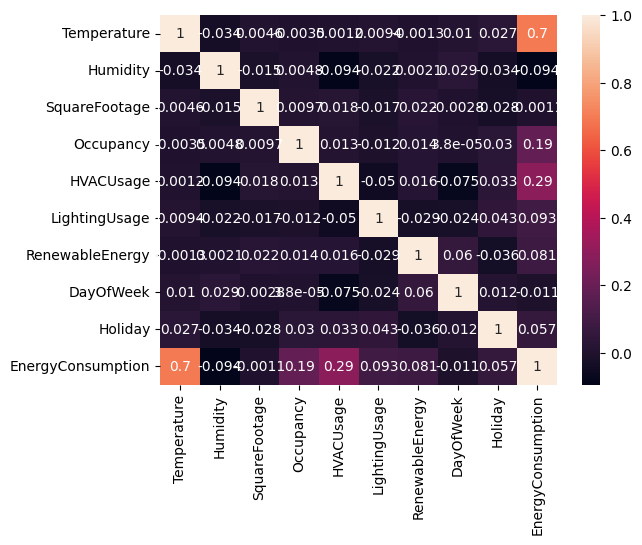

In [69]:
sns.heatmap(data.corr(),annot = True)
plt.show()

In [70]:
data

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,25.139433,43.431581,1565.693999,5,1,0,2.774699,1,0,75.364373
1,27.731651,54.225919,1411.064918,1,1,1,21.831384,6,0,83.401855
2,28.704277,58.907658,1755.715009,2,0,0,6.764672,7,0,78.270888
3,20.080469,50.371637,1452.316318,1,0,1,8.623447,3,0,56.519850
4,23.097359,51.401421,1094.130359,9,1,0,3.071969,5,0,70.811732
...,...,...,...,...,...,...,...,...,...,...
995,28.619382,48.850160,1080.087000,5,0,0,21.194696,6,0,82.306692
996,23.836647,47.256435,1705.235156,4,0,1,25.748176,2,1,66.577320
997,23.005340,48.720501,1320.285281,6,0,1,0.297079,5,1,72.753471
998,25.138365,31.306459,1309.079719,3,1,0,20.425163,4,1,76.950389


In [71]:
from sklearn.model_selection import train_test_split
X = data[['Temperature', 'Humidity','SquareFootage','Occupancy','HVACUsage','LightingUsage','DayOfWeek']] ## Input Features
y = data['EnergyConsumption'] ## Target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [72]:
X_train

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,DayOfWeek
29,23.220630,46.073879,1649.510353,2,0,1,2
535,22.039777,33.460865,1991.131663,7,0,0,5
695,26.118116,43.022562,1576.980679,2,0,0,1
557,23.526242,44.682245,1139.804809,6,1,1,1
836,26.718431,32.282471,1735.317885,5,0,1,6
...,...,...,...,...,...,...,...
106,21.631351,50.476082,1888.701582,4,0,0,2
270,23.349864,33.098464,1721.521278,3,1,1,3
860,26.987898,56.785380,1149.656331,0,1,0,6
435,29.196131,41.387759,1010.271709,6,1,1,1


In [73]:
X_test

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,DayOfWeek
521,26.135291,48.498729,1303.715986,8,1,1,4
737,27.185351,33.581353,1457.566456,4,1,0,3
740,25.154024,37.593489,1869.598548,6,0,1,1
660,29.938483,57.730876,1596.822747,9,0,1,1
411,22.296357,40.901362,1568.750108,8,1,0,2
...,...,...,...,...,...,...,...
408,29.963233,52.727922,1419.504118,5,0,1,3
332,24.754216,54.100809,1314.109010,0,0,0,2
208,26.943941,31.957600,1846.266567,0,1,1,6
613,28.076279,45.808424,1378.703941,5,1,1,6


In [74]:
y_train

29     74.160338
535    64.792172
695    69.365616
557    77.942641
836    80.055884
         ...    
106    71.179064
270    76.639729
860    82.560688
435    86.075403
102    72.767037
Name: EnergyConsumption, Length: 800, dtype: float64

In [75]:
y_test

521    86.920611
737    88.351606
740    79.431363
660    90.009188
411    83.891100
         ...    
408    86.919371
332    66.833390
208    80.043926
613    76.399561
78     67.484788
Name: EnergyConsumption, Length: 200, dtype: float64

In [76]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [77]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators= 100,random_state= 42)
model2.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [78]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = model2.predict(X_test)
print("R2 Score",r2_score(y_test,y_pred))
print("RMSE" , mean_squared_error(y_test,y_pred)) ## RandomForestRegressor

R2 Score 0.5326152178338897
RMSE 30.613645059729187


In [79]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(X_test)
print("R2 Score",r2_score(y_test,y_pred))
print("RMSE" , mean_squared_error(y_test,y_pred)) ## LinearRegression

R2 Score 0.6132031457759483
RMSE 25.335145809746336


In [118]:
## Using Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn .preprocessing import StandardScaler

In [128]:
poly_model = Pipeline([ ("standard_Scalar",StandardScaler()),
    ("poly_features",PolynomialFeatures(degree=1,include_bias = False)),("ridge_reg",Ridge(alpha=2.0))
])
poly_model.fit(X_train,y_train)

Pipeline(steps=[('standard_Scalar', StandardScaler()),
                ('poly_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('ridge_reg', Ridge(alpha=2.0))])

In [129]:
y2_pred = poly_model.predict(X_test)
r2 = r2_score(y_test,y2_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [130]:
r2
## No change with Polynomial Regression with degree = 2

0.6131532772922106